In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from xgboost import XGBClassifier

In [5]:
X_train=pd.read_csv('/Users/ayushranjan/Desktop/finale_test/train.csv')
X_test=pd.read_csv('/Users/ayushranjan/Desktop/finale_test/test.csv')

In [6]:
Y_train=X_train['Loan_Status']
Y_train

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [7]:
col=X_train.columns
col[:len(col)-1]
X_train=X_train[col[:len(col)-1]]
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [8]:
X_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [9]:
def prepair_missing_data(df):
    
    for feature in df:
        if df[feature].isnull().sum()>0:
            if df[feature].dtypes=='object':
                # Handling missing value for categrical data 
                # fill the missing data by most common value
                df[feature].fillna(df[feature].value_counts().index[0],inplace=True)
            elif feature=='Credit_History':
                df[feature].fillna(method='bfill',inplace=True)
                
                
            else :
                # Handling missing value for continuous data
                # fill the missing data with mean
                df[feature].fillna(df[feature].mean(),inplace=True)
    return df

In [10]:
X_train=prepair_missing_data(X_train)
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [11]:
X_test=prepair_missing_data(X_test)
X_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [12]:
def encoding_categorical_data(df):
    from sklearn.preprocessing import LabelEncoder
    encoder=LabelEncoder()
    for feature in df:
        if df[feature].dtypes=='object':
            df[feature]=encoder.fit_transform(df[feature])
    return df

In [13]:
X_train=encoding_categorical_data(X_train)
X_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [14]:

X_test=encoding_categorical_data(X_test)

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
Y_train=encoder.fit_transform(Y_train)


In [18]:
model=XGBClassifier()
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [19]:
y_pred=model.predict(X_test)

In [20]:
model.score(X_train,Y_train)

0.8517915309446255

In [21]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

In [22]:
%matplotlib inline

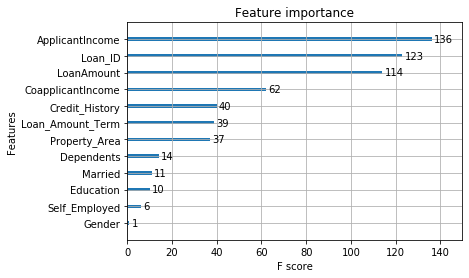

In [23]:
plot_importance(model)


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [25]:
n_estimators=[50,100,150,200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth,n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train,Y_train)

Best: -0.498152 using {'max_depth': 2, 'n_estimators': 50}
-0.498152 (0.043579) with: {'max_depth': 2, 'n_estimators': 50}
-0.505952 (0.051035) with: {'max_depth': 2, 'n_estimators': 100}
-0.521654 (0.058887) with: {'max_depth': 2, 'n_estimators': 150}
-0.536226 (0.060682) with: {'max_depth': 2, 'n_estimators': 200}
-0.517625 (0.046049) with: {'max_depth': 4, 'n_estimators': 50}
-0.541457 (0.061042) with: {'max_depth': 4, 'n_estimators': 100}
-0.569688 (0.063443) with: {'max_depth': 4, 'n_estimators': 150}
-0.598518 (0.067434) with: {'max_depth': 4, 'n_estimators': 200}
-0.537710 (0.046286) with: {'max_depth': 6, 'n_estimators': 50}
-0.587395 (0.066149) with: {'max_depth': 6, 'n_estimators': 100}
-0.629036 (0.081772) with: {'max_depth': 6, 'n_estimators': 150}
-0.664372 (0.096193) with: {'max_depth': 6, 'n_estimators': 200}
-0.563220 (0.050492) with: {'max_depth': 8, 'n_estimators': 50}
-0.621853 (0.068105) with: {'max_depth': 8, 'n_estimators': 100}
-0.668821 (0.084003) with: {'max_de

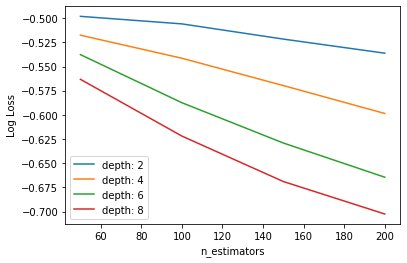

In [26]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')